In [562]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Retail_Transactions_2000 (3).csv')

In [563]:
df.shape

(2000, 11)

In [564]:
df.columns

Index(['TransactionID', 'CustomerID', 'Gender', 'Age', 'City',
       'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode',
       'TotalAmount'],
      dtype='object')

In [565]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [566]:
df.duplicated().sum()

np.int64(0)

In [567]:
df.fillna({'Age':df['Age'].mean(),'City':df['City'].mode()},inplace=True)

In [568]:
df.drop_duplicates(subset=['TransactionID'],inplace=True)


In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [570]:
df['Gender']=df['Gender'].str.strip()

In [571]:
df['Gender'].value_counts()

Gender
Male      673
Female    664
Other     663
Name: count, dtype: int64

In [572]:
df=df[(df['Quantity'] > 0) & (df['Price'] > 0)]
df.shape

(2000, 11)

In [573]:
df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'],errors='coerce')
df['Month'] = df['PurchaseDate'].dt.month
df['DayOfWeek'] = df['PurchaseDate'].dt.day_name()


In [574]:
bins = [0,25,40,60,120]
labels = ['18-25','26-40','41-60','60+']
df['AgeGroup'] = pd.cut(df['Age'],bins=bins,labels=labels)
df

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,Month,DayOfWeek,AgeGroup
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437,3,Wednesday,26-40
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255,1,Sunday,18-25
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111,4,Tuesday,41-60
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730,8,Wednesday,18-25
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123,9,Saturday,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,T01996,C1151,Male,44,Jaipur,Fashion,2,2436,2023-01-15,Wallet,4872,1,Sunday,41-60
1996,T01997,C5888,Male,53,Ahmedabad,Beauty,3,2744,2023-01-14,Wallet,8232,1,Saturday,41-60
1997,T01998,C2758,Male,45,Lucknow,Electronics,1,3246,2023-06-19,Wallet,3246,6,Monday,41-60
1998,T01999,C6489,Male,43,Bengaluru,Sports,2,2709,2023-01-15,Wallet,5418,1,Sunday,41-60


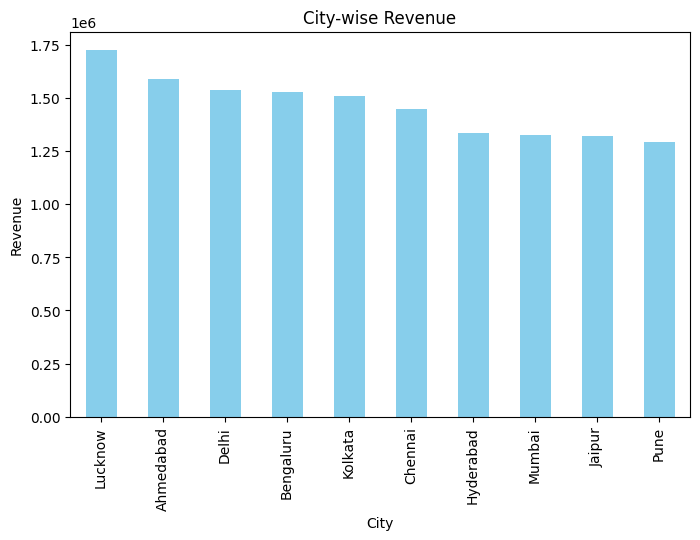

In [575]:
city=df.groupby('City')['TotalAmount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
city.plot(kind='bar', color='skyblue', title='City-wise Revenue')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.show()

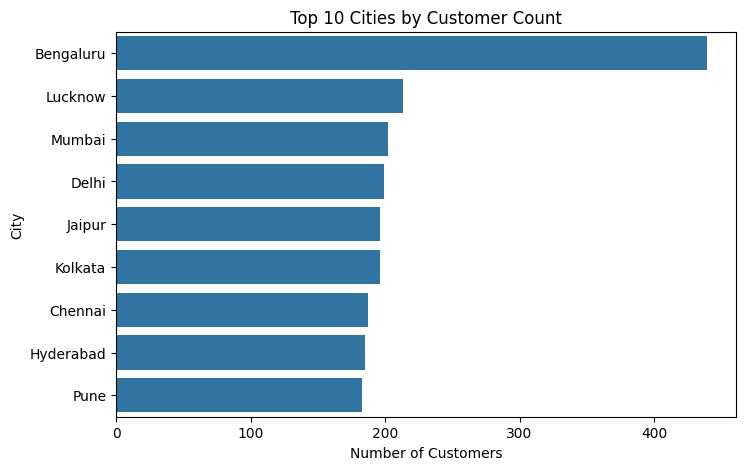

In [ ]:
top_cities=df['City'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 Cities by Customer Count")
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.show()

In [577]:
df['Gender_Type'] = df['Gender'].map({'Male':0,'Female':1,'Other':2})

In [578]:
df=pd.get_dummies(df,columns=['City'],drop_first=True,dtype=int)

In [579]:
df.head()

,TransactionID,CustomerID,Gender,Age,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,...,Gender_Type,City_Bengaluru,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata,City_Lucknow,City_Mumbai,City_Pune
0,T00001,C2824,Female,33,Fashion,3,4479,2023-03-15,Cash,13437,...,1,1,0,0,0,0,0,0,0,0
1,T00002,C1409,Other,20,Books,5,1051,2023-01-22,Card,5255,...,2,0,0,0,0,0,0,0,0,1
2,T00003,C5506,Other,47,Furniture,1,111,2023-04-18,Wallet,111,...,2,0,0,0,0,0,0,0,0,1
3,T00004,C5012,Other,21,Groceries,5,2946,2023-08-09,Cash,14730,...,2,0,0,0,1,0,0,0,0,0
4,T00005,C4657,Female,41,Sports,1,3123,2023-09-23,Wallet,3123,...,1,0,1,0,0,0,0,0,0,0


In [580]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scaler = StandardScaler()
df[['Age','Price','TotalAmount']]=scaler.fit_transform(df[['Age','Price','TotalAmount']])

In [581]:
df.to_csv('Retail_Cleaned.csv',index=False)

In [582]:
df1=pd.read_csv('Retail_Cleaned.csv')

In [583]:
df1.head()

,TransactionID,CustomerID,Gender,Age,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,...,Gender_Type,City_Bengaluru,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata,City_Lucknow,City_Mumbai,City_Pune
0,T00001,C2824,Female,-0.769570,Fashion,3,1.402371,2023-03-15,Cash,1.074680,...,1,1,0,0,0,0,0,0,0,0
1,T00002,C1409,Other,-1.626186,Books,5,-1.022646,2023-01-22,Card,-0.359843,...,2,0,0,0,0,0,0,0,0,1
2,T00003,C5506,Other,0.152939,Furniture,1,-1.687615,2023-04-18,Wallet,-1.261723,...,2,0,0,0,0,0,0,0,0,1
3,T00004,C5012,Other,-1.560293,Groceries,5,0.317905,2023-08-09,Cash,1.301377,...,2,0,0,0,1,0,0,0,0,0
4,T00005,C4657,Female,-0.242422,Sports,1,0.443117,2023-09-23,Wallet,-0.733639,...,1,0,1,0,0,0,0,0,0,0


<Axes: xlabel='Age', ylabel='Density'>

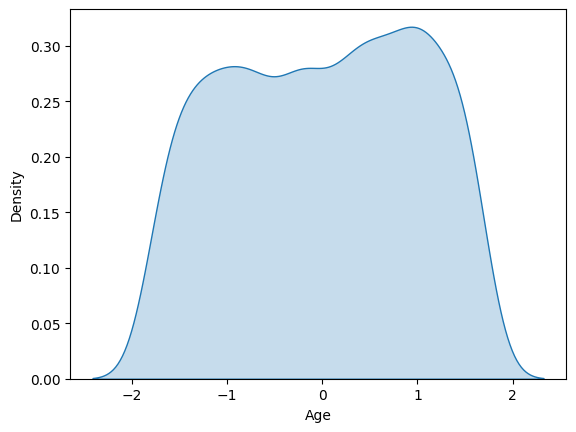

In [584]:
sns.kdeplot(x=df1['Age'],fill=True)

<Axes: xlabel='Gender_Type', ylabel='count'>

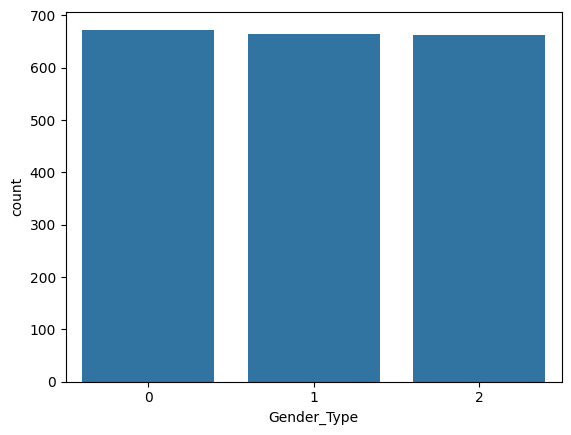

In [585]:
sns.countplot(x='Gender_Type', data=df1)

In [586]:
df1

,TransactionID,CustomerID,Gender,Age,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,...,Gender_Type,City_Bengaluru,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata,City_Lucknow,City_Mumbai,City_Pune
0,T00001,C2824,Female,-0.769570,Fashion,3,1.402371,2023-03-15,Cash,1.074680,...,1,1,0,0,0,0,0,0,0,0
1,T00002,C1409,Other,-1.626186,Books,5,-1.022646,2023-01-22,Card,-0.359843,...,2,0,0,0,0,0,0,0,0,1
2,T00003,C5506,Other,0.152939,Furniture,1,-1.687615,2023-04-18,Wallet,-1.261723,...,2,0,0,0,0,0,0,0,0,1
3,T00004,C5012,Other,-1.560293,Groceries,5,0.317905,2023-08-09,Cash,1.301377,...,2,0,0,0,1,0,0,0,0,0
4,T00005,C4657,Female,-0.242422,Sports,1,0.443117,2023-09-23,Wallet,-0.733639,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,T01996,C1151,Male,-0.044742,Fashion,2,-0.042876,2023-01-15,Wallet,-0.426993,...,0,0,0,0,0,1,0,0,0,0
1996,T01997,C5888,Male,0.548300,Beauty,3,0.175007,2023-01-14,Wallet,0.162104,...,0,0,0,0,0,0,0,0,0,0
1997,T01998,C2758,Male,0.021152,Electronics,1,0.530129,2023-06-19,Wallet,-0.712074,...,0,0,0,0,0,0,0,1,0,0
1998,T01999,C6489,Male,-0.110635,Sports,2,0.150248,2023-01-15,Wallet,-0.331265,...,0,1,0,0,0,0,0,0,0,0


In [587]:
sales=df1.groupby('ProductCategory')['Quantity'].sum().sort_values(ascending=False)


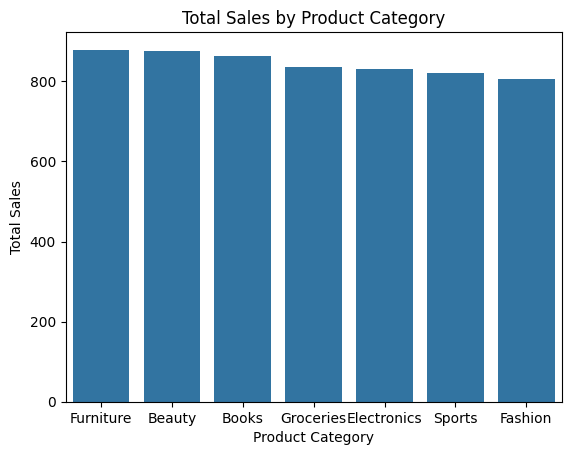

In [588]:
sns.barplot(x=sales.index,y=sales.values)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

In [589]:
df1.head()

,TransactionID,CustomerID,Gender,Age,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,...,Gender_Type,City_Bengaluru,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata,City_Lucknow,City_Mumbai,City_Pune
0,T00001,C2824,Female,-0.769570,Fashion,3,1.402371,2023-03-15,Cash,1.074680,...,1,1,0,0,0,0,0,0,0,0
1,T00002,C1409,Other,-1.626186,Books,5,-1.022646,2023-01-22,Card,-0.359843,...,2,0,0,0,0,0,0,0,0,1
2,T00003,C5506,Other,0.152939,Furniture,1,-1.687615,2023-04-18,Wallet,-1.261723,...,2,0,0,0,0,0,0,0,0,1
3,T00004,C5012,Other,-1.560293,Groceries,5,0.317905,2023-08-09,Cash,1.301377,...,2,0,0,0,1,0,0,0,0,0
4,T00005,C4657,Female,-0.242422,Sports,1,0.443117,2023-09-23,Wallet,-0.733639,...,1,0,1,0,0,0,0,0,0,0


In [590]:
sales_trend=df1.groupby('Month')['TotalAmount'].sum()

<Axes: xlabel='Month'>

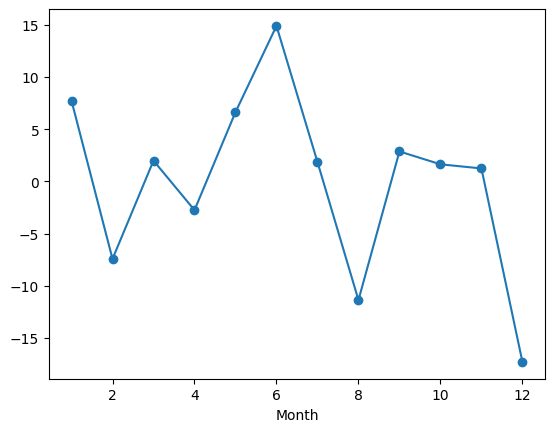

In [591]:
sales_trend.plot(kind='line', marker='o')

In [592]:
df1.head()

,TransactionID,CustomerID,Gender,Age,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,...,Gender_Type,City_Bengaluru,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata,City_Lucknow,City_Mumbai,City_Pune
0,T00001,C2824,Female,-0.769570,Fashion,3,1.402371,2023-03-15,Cash,1.074680,...,1,1,0,0,0,0,0,0,0,0
1,T00002,C1409,Other,-1.626186,Books,5,-1.022646,2023-01-22,Card,-0.359843,...,2,0,0,0,0,0,0,0,0,1
2,T00003,C5506,Other,0.152939,Furniture,1,-1.687615,2023-04-18,Wallet,-1.261723,...,2,0,0,0,0,0,0,0,0,1
3,T00004,C5012,Other,-1.560293,Groceries,5,0.317905,2023-08-09,Cash,1.301377,...,2,0,0,0,1,0,0,0,0,0
4,T00005,C4657,Female,-0.242422,Sports,1,0.443117,2023-09-23,Wallet,-0.733639,...,1,0,1,0,0,0,0,0,0,0


In [593]:
paymode=df1['PaymentMode'].value_counts()
paymode

PaymentMode
Card      520
Wallet    519
UPI       484
Cash      477
Name: count, dtype: int64

(np.float64(-1.0999996286567628),
 np.float64(1.0999999823169886),
 np.float64(-1.0999989689227563),
 np.float64(1.0999998671033868))

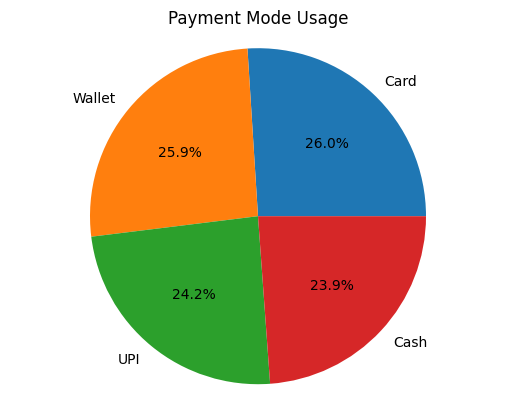

In [594]:
plt.pie(paymode,labels=paymode.index,autopct='%1.1f%%')
plt.title('Payment Mode Usage')
plt.axis('equal')  

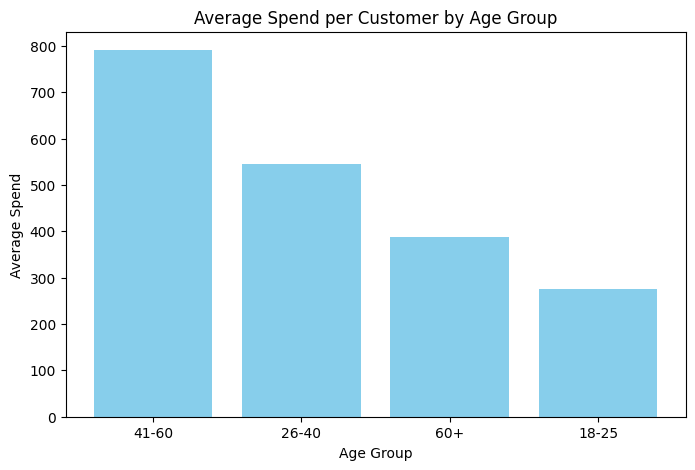

In [595]:
plt.figure(figsize=(8,5))
plt.bar(df1['AgeGroup'].value_counts().index,df1['AgeGroup'].value_counts().values, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Average Spend')
plt.title('Average Spend per Customer by Age Group')
plt.show()

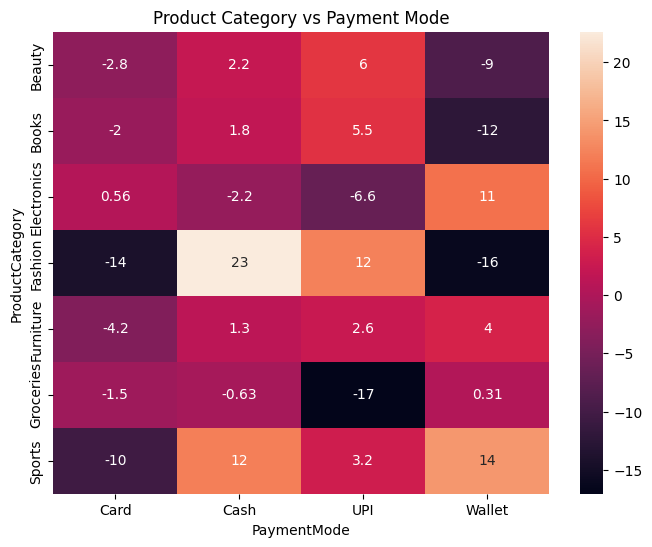

In [596]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
a=df1.pivot_table(index='ProductCategory', 
                            columns='PaymentMode', 
                            values='TotalAmount', 
                            aggfunc='sum',fill_value=0)

plt.figure(figsize=(8,6))
sns.heatmap(a,annot=True)
plt.title('Product Category vs Payment Mode')
plt.show()
